In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Equações retiradas [daqui](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec30.pdf)

In [2]:
M_val = 13.6 #kg
M_val = 3.6 #kg
I0_val = 0.123 #kgm²
I0_val = 0.44064 #kgm²
I_val = 0.00288 #kgm²
zg_val = 0.180 #m
g_val = 9.81 #m/s²

In [3]:
t = sp.Symbol("t")

theta = sp.Function("theta")(t)
phi = sp.Function("phi")(t)
psi = sp.Function("psi")(t)

# theta_d = theta.diff()
# phi_d = phi.diff()
# psi_d = psi.diff()

theta_d = sp.Function(r"\dot{\theta}")(t)
phi_d = sp.Function("\dot{\phi}")(t)
psi_d = sp.Function("\dot{\psi}")(t)

# theta_dd = theta.diff().diff()
# phi_dd = phi.diff().diff()
# psi_dd = psi.diff().diff()

theta_dd = sp.Function(r"\ddot{\theta}")(t)
phi_dd = sp.Function("\ddot{\phi}")(t)
psi_dd = sp.Function("\ddot{\psi}")(t)

M, I0, I, zg, g = sp.symbols("M I_0 I z_g g")

In [4]:
Mx = I0*(theta_dd - phi_d**2*sp.sin(theta)*sp.cos(theta))+I*phi_d*sp.sin(theta)*(phi_d*sp.cos(theta)+psi_d)

In [5]:
Mx

I*(\dot{\phi}(t)*cos(theta(t)) + \dot{\psi}(t))*\dot{\phi}(t)*sin(theta(t)) + I_0*(\ddot{\theta}(t) - \dot{\phi}(t)**2*sin(theta(t))*cos(theta(t)))

In [6]:
My = I0*(phi_dd*sp.sin(theta)+2*phi_d*theta_d*sp.cos(theta)) - I*theta_d*(phi_d*sp.cos(theta)+psi_d)

In [7]:
My

-I*(\dot{\phi}(t)*cos(theta(t)) + \dot{\psi}(t))*\dot{\theta}(t) + I_0*(\ddot{\phi}(t)*sin(theta(t)) + 2*\dot{\phi}(t)*\dot{\theta}(t)*cos(theta(t)))

In [8]:
Mz = I*(psi_dd + phi_dd*sp.cos(theta) - phi_d*theta_d*sp.sin(theta))

In [9]:
Mz

I*(\ddot{\phi}(t)*cos(theta(t)) + \ddot{\psi}(t) - \dot{\phi}(t)*\dot{\theta}(t)*sin(theta(t)))

In [10]:
system = [
    sp.Eq(Mx, M*g*zg*sp.sin(theta)),
    sp.Eq(My, 0),
    sp.Eq(Mz, 0),
]

In [11]:
for eq in system:
    display(eq)

Eq(I*(\dot{\phi}(t)*cos(theta(t)) + \dot{\psi}(t))*\dot{\phi}(t)*sin(theta(t)) + I_0*(\ddot{\theta}(t) - \dot{\phi}(t)**2*sin(theta(t))*cos(theta(t))), M*g*z_g*sin(theta(t)))

Eq(-I*(\dot{\phi}(t)*cos(theta(t)) + \dot{\psi}(t))*\dot{\theta}(t) + I_0*(\ddot{\phi}(t)*sin(theta(t)) + 2*\dot{\phi}(t)*\dot{\theta}(t)*cos(theta(t))), 0)

Eq(I*(\ddot{\phi}(t)*cos(theta(t)) + \ddot{\psi}(t) - \dot{\phi}(t)*\dot{\theta}(t)*sin(theta(t))), 0)

In [12]:
solution = sp.linsolve(system, [theta_dd, phi_dd, psi_dd])

In [13]:
for var, sol in zip([theta_dd, phi_dd, psi_dd], solution.args[0]):
    display(sp.Eq(var, sol))

Eq(\ddot{\theta}(t), (-I*\dot{\phi}(t)**2*cos(theta(t)) - I*\dot{\phi}(t)*\dot{\psi}(t) + I_0*\dot{\phi}(t)**2*cos(theta(t)) + M*g*z_g)*sin(theta(t))/I_0)

Eq(\ddot{\phi}(t), (I*\dot{\phi}(t)*cos(theta(t)) + I*\dot{\psi}(t) - 2*I_0*\dot{\phi}(t)*cos(theta(t)))*\dot{\theta}(t)/(I_0*sin(theta(t))))

Eq(\ddot{\psi}(t), (-I*\dot{\phi}(t)*cos(theta(t))**2 - I*\dot{\psi}(t)*cos(theta(t)) + I_0*\dot{\phi}(t)*cos(theta(t))**2 + I_0*\dot{\phi}(t))*\dot{\theta}(t)/(I_0*sin(theta(t))))

In [14]:
numeric_solution = [eq.subs(M, M_val)
                    .subs(I0, I0_val)
                    .subs(I, I_val)
                    .subs(zg, zg_val)
                    .subs(g, g_val) 
                      for eq in solution.args[0]]

In [15]:
for var, sol in zip([theta_dd, phi_dd, psi_dd], numeric_solution):
    display(sp.Eq(var, sol))

Eq(\ddot{\theta}(t), 2.26942628903413*(0.43776*\dot{\phi}(t)**2*cos(theta(t)) - 0.00288*\dot{\phi}(t)*\dot{\psi}(t) + 6.35688)*sin(theta(t)))

Eq(\ddot{\phi}(t), 2.26942628903413*(-0.8784*\dot{\phi}(t)*cos(theta(t)) + 0.00288*\dot{\psi}(t))*\dot{\theta}(t)/sin(theta(t)))

Eq(\ddot{\psi}(t), 2.26942628903413*(0.43776*\dot{\phi}(t)*cos(theta(t))**2 + 0.44064*\dot{\phi}(t) - 0.00288*\dot{\psi}(t)*cos(theta(t)))*\dot{\theta}(t)/sin(theta(t)))

O vetor de estados será $[\theta ~ \phi ~ \psi ~ \dot{\theta} ~ \dot{\phi} ~ \dot{\psi}]$

In [16]:
input_args = [theta, phi, psi, theta_d, phi_d, psi_d]
y0 = [-np.pi/2 + 0.5, 0, 0, 0, 55, 3000]
# y0 = [np.pi/10, 0, 0, 0, 10, 10]


# theta inicial = pi/2
# theta ponto inicial = 0
# theta dois pontos inicial = 0  < redundante!
# phi inicial= 0 
# phi ponto inicial = 55 rad/s
# phi dois pontos inicial = 0 < redundante!
# psi inicial = 0
# psi ponto inicial = 942 rad/s
# psi dois pontos inicial = 0 < redundante!

In [17]:
theta_dd_func = sp.lambdify(input_args, numeric_solution[0], "numpy")
phi_dd_func = sp.lambdify(input_args, numeric_solution[1], "numpy")
psi_dd_func = sp.lambdify(input_args, numeric_solution[2], "numpy")

In [18]:
theta_dd_func(*y0)

-330.6542536284731

In [19]:
phi_dd_func(*y0)

0.0

In [20]:
psi_dd_func(*y0)

-0.0

In [21]:
def func(t, y):
    retval = np.empty(y.shape)
    retval[0] = y[3]
    retval[1] = y[4]
    retval[2] = y[5]
    
    retval[3] = theta_dd_func(*y)
    retval[4] = phi_dd_func(*y)
    retval[5] = psi_dd_func(*y)
    
    return retval

In [22]:
from scipy.integrate import solve_ivp

In [23]:
t_interval = (0, 0.2)
result = solve_ivp(func, t_interval, y0, max_step=1e-5)

In [24]:
result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 120014
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 5.73597871e-07, 6.30957658e-06, ...,
       1.99986310e-01, 1.99996310e-01, 2.00000000e-01])
 t_events: None
        y: array([[-1.07079633e+00, -1.07079633e+00, -1.07079633e+00, ...,
        -1.25416114e+00, -1.25411253e+00, -1.25409459e+00],
       [ 0.00000000e+00,  3.15478829e-05,  3.47026711e-04, ...,
         1.03829992e+01,  1.03835051e+01,  1.03836918e+01],
       [ 0.00000000e+00,  1.72079361e-03,  1.89287297e-02, ...,
         6.01432453e+02,  6.01462559e+02,  6.01473670e+02],
       [ 0.00000000e+00, -1.89662576e-04, -2.08628829e-03, ...,
         4.85991878e+00,  4.86171785e+00,  4.86238147e+00],
       [ 5.50000000e+01,  5.50000000e+01,  5.49999998e+01, ...,
         5.05869630e+01,  5.05875628e+01,  5.05877842e+01],
       [ 3.00000000e+03,  3.00000000e+03,  3.00000000e+

In [25]:
def plot_result(result):

    fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(9, 8))
    axs[0].plot(result.t, result.y[0,:], 'r', label=r"$\theta$")
    axs[0].legend()
    axs[1].plot(result.t, result.y[3,:], 'b', label=r"$\dot{\theta}$")
    axs[1].legend()
    theta_dd_array = [theta_dd_func(*y) for y in np.transpose(result.y)]
    axs[2].plot(result.t, theta_dd_array, 'k', label=r"$\ddot{\theta}$")
    axs[2].legend()
#     axs.plot(result.t, result.y[1,:], label=r"$\phi$")
#     axs.plot(result.t, result.y[2,:], label=r"$\psi$")
    plt.legend()
    
def plot_result2(result):

    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(9, 8))
    axs[0].plot(result.t, result.y[4,:], 'darkorange', label=r"$\dot{\phi}$")
    axs[0].legend()
    axs[1].plot(result.t, result.y[5,:], 'olive', label=r"$\dot{\psi}$")
    axs[1].legend()
    
def plot_result_d(result):

    fig, axs = plt.subplots(figsize=(9, 8))
    axs.plot(result.y[0,:], result.y[3,:], label=r"$\dot{\theta}$")
#     axs.plot(result.t, result.y[4,:], label=r"$\dot{\phi}$")
#     axs.plot(result.t, result.y[5,:], label=r"$\dot{\psi}$")
    plt.legend()
    
def plot_results_d(results):

    n = len(results)
    colors = plt.cm.jet(np.linspace(0,1,n))
    fig, axs = plt.subplots(figsize=(9, 8))
    for result, color in zip(results, colors):
        axs.plot(result.y[0,:], result.y[3,:], color=color, label=f'{result.y[5,0]:.1f}')
    plt.xlabel(r"Posição $\theta$")
    plt.ylabel(r"Velocidade $\dot{\theta}$")
    fig.suptitle("$\dot{\phi}$ = " + f"{result.y[4,0]:.1f}")
    plt.legend()

In [26]:
t_interval = (0, 1)
teste10 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 10, 100*2**i]
    print(y)
    teste10[i] = solve_ivp(func, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 10, 100]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 10, 200]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 10, 400]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 10, 800]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 10, 1600]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 10, 3200]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 10, 6400]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 10, 12800]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 10, 25600]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 10, 51200]


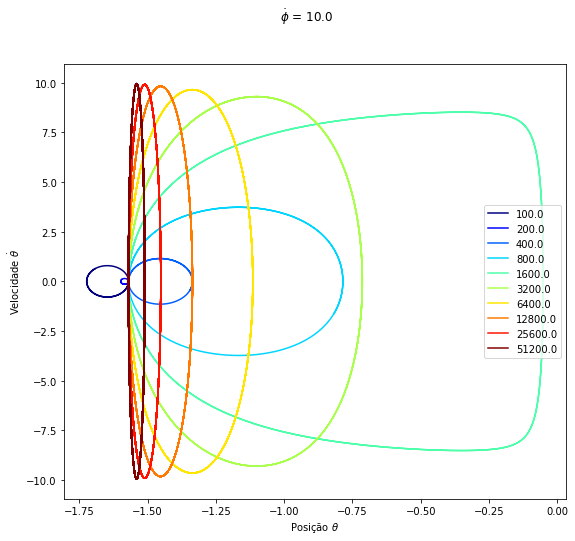

In [27]:
plot_results_d(teste10)

In [28]:
t_interval = (0, 0.5)
teste10_2 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 10, 1131*2**(i/10)]
    print(y)
    teste10_2[i] = solve_ivp(func, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 10, 1131.0]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 10, 1212.1757861285475]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 10, 1299.1778395016468]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 10, 1392.4243314931005]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 10, 1492.3634470841434]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 10, 1599.4755390439707]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 10, 1714.27543672326]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 10, 1837.3149205578047]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 10, 1969.1853741758327]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 10, 2110.5206268562583]


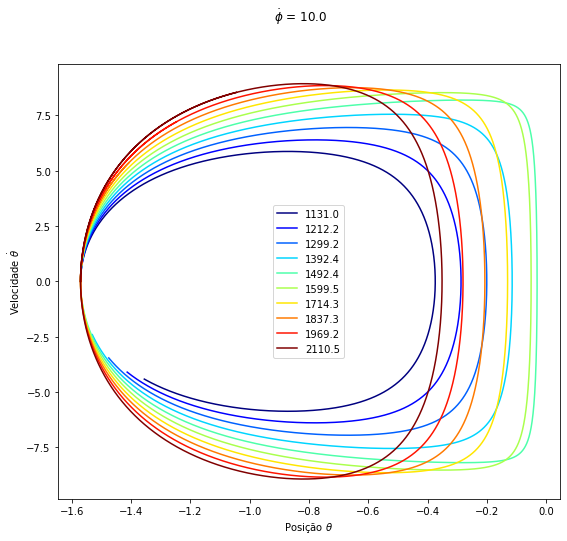

In [29]:
plot_results_d(teste10_2)

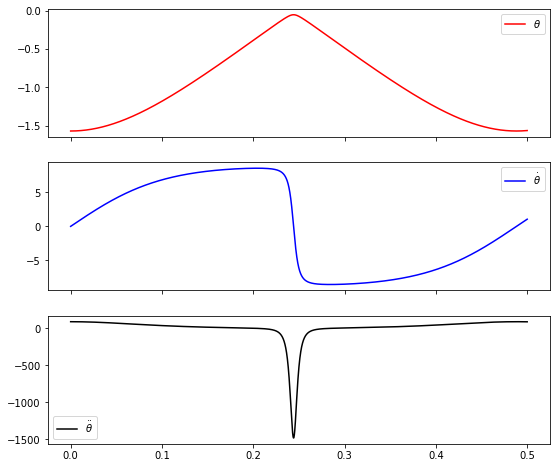

In [30]:
plot_result(teste10_2[5])

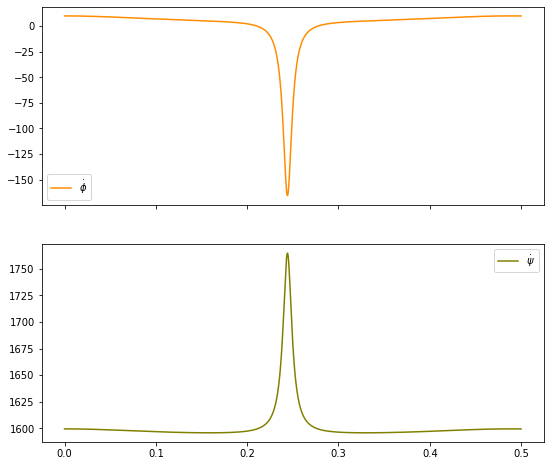

In [31]:
plot_result2(teste10_2[5])

In [32]:
t_interval = (0, 0.2)
teste25 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 25, 100*2**i]
    print(y)
    teste25[i] = solve_ivp(func, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 25, 100]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 25, 200]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 25, 400]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 25, 800]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 25, 1600]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 25, 3200]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 25, 6400]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 25, 12800]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 25, 25600]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 25, 51200]


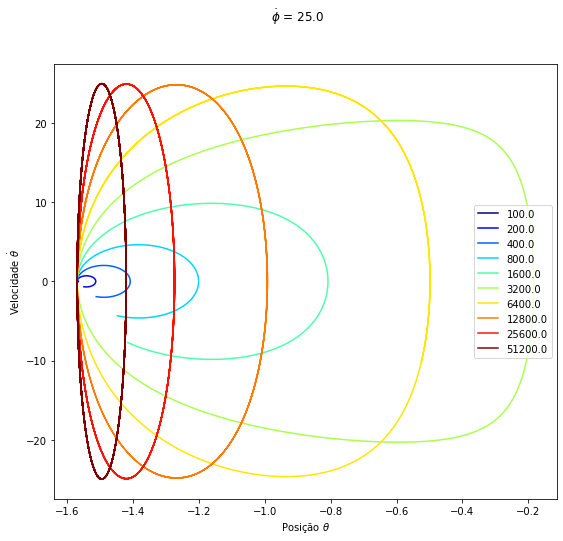

In [33]:
plot_results_d(teste25)

In [34]:
t_interval = (0, 0.2)
teste55 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 55, 100*2**i]
    print(y)
    teste55[i] = solve_ivp(func, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 55, 100]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 55, 200]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 55, 400]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 55, 800]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 55, 1600]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 55, 3200]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 55, 6400]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 55, 12800]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 55, 25600]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 55, 51200]


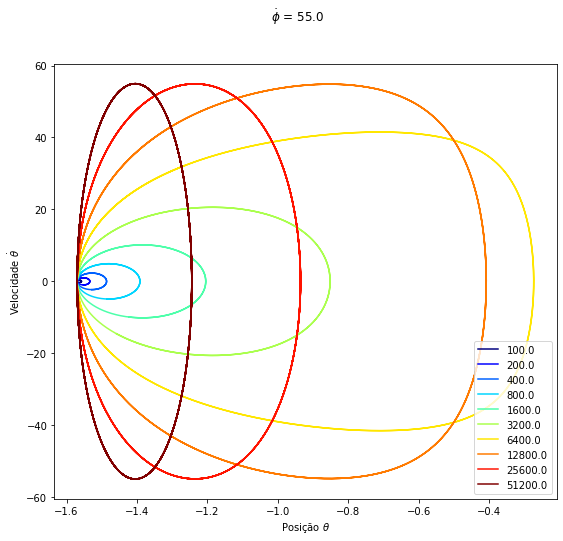

In [35]:
plot_results_d(teste55)

In [36]:
t_interval = (0, 0.2)
teste110 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 55, 100*2**i]
    print(y)
    teste110[i] = solve_ivp(func, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 55, 100]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 55, 200]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 55, 400]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 55, 800]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 55, 1600]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 55, 3200]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 55, 6400]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 55, 12800]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 55, 25600]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 55, 51200]


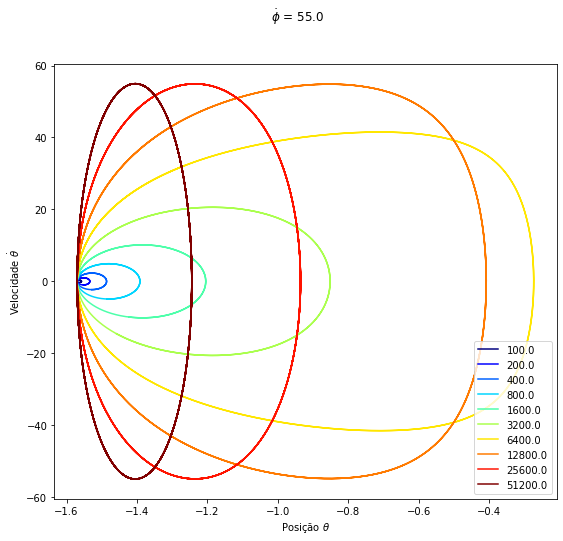

In [37]:
plot_results_d(teste110)

In [38]:
def func2(t, y):
    retval = np.empty(y.shape)
    retval[0] = y[3]
    retval[1] = y[4]
    retval[2] = y[5]
    
    retval[3] = theta_dd_func(*y)
    retval[4] = phi_dd_func(*y)
    retval[5] = 0 #psi_dd_func(*y)
    
    return retval

In [39]:
t_interval = (0, 0.5)
teste10_3 = [None]*10
for i in range(10):
    print(f"i: {i+1}/10")
    y = [-np.pi/2+0.001, 0, 0, 0, 10, 1131*2**(i/10)]
    print(y)
    teste10_3[i] = solve_ivp(func2, t_interval, y, max_step=1e-5)

i: 1/10
[-1.5697963267948967, 0, 0, 0, 10, 1131.0]
i: 2/10
[-1.5697963267948967, 0, 0, 0, 10, 1212.1757861285475]
i: 3/10
[-1.5697963267948967, 0, 0, 0, 10, 1299.1778395016468]
i: 4/10
[-1.5697963267948967, 0, 0, 0, 10, 1392.4243314931005]
i: 5/10
[-1.5697963267948967, 0, 0, 0, 10, 1492.3634470841434]
i: 6/10
[-1.5697963267948967, 0, 0, 0, 10, 1599.4755390439707]
i: 7/10
[-1.5697963267948967, 0, 0, 0, 10, 1714.27543672326]
i: 8/10
[-1.5697963267948967, 0, 0, 0, 10, 1837.3149205578047]
i: 9/10
[-1.5697963267948967, 0, 0, 0, 10, 1969.1853741758327]
i: 10/10
[-1.5697963267948967, 0, 0, 0, 10, 2110.5206268562583]


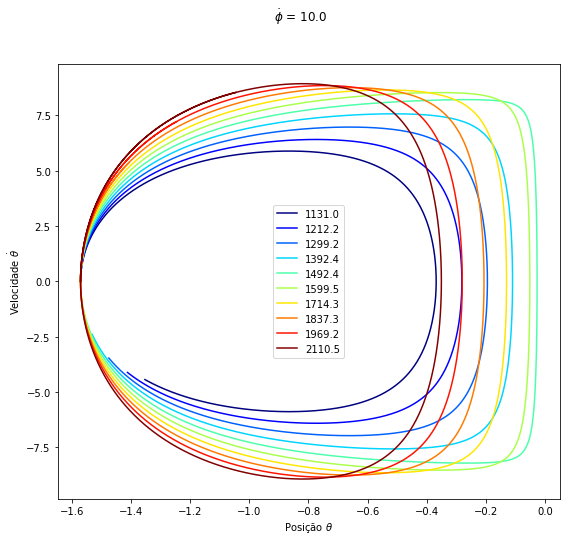

In [40]:
plot_results_d(teste10_3)

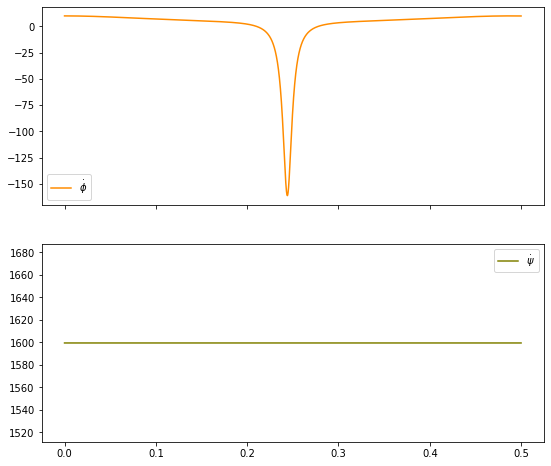

In [41]:
plot_result2(teste10_3[5])